In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r'C:\Users\prane\OneDrive\Desktop\local_rep\freelancing\Data\term_deposit_pred\term_dep_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
import seaborn as sns

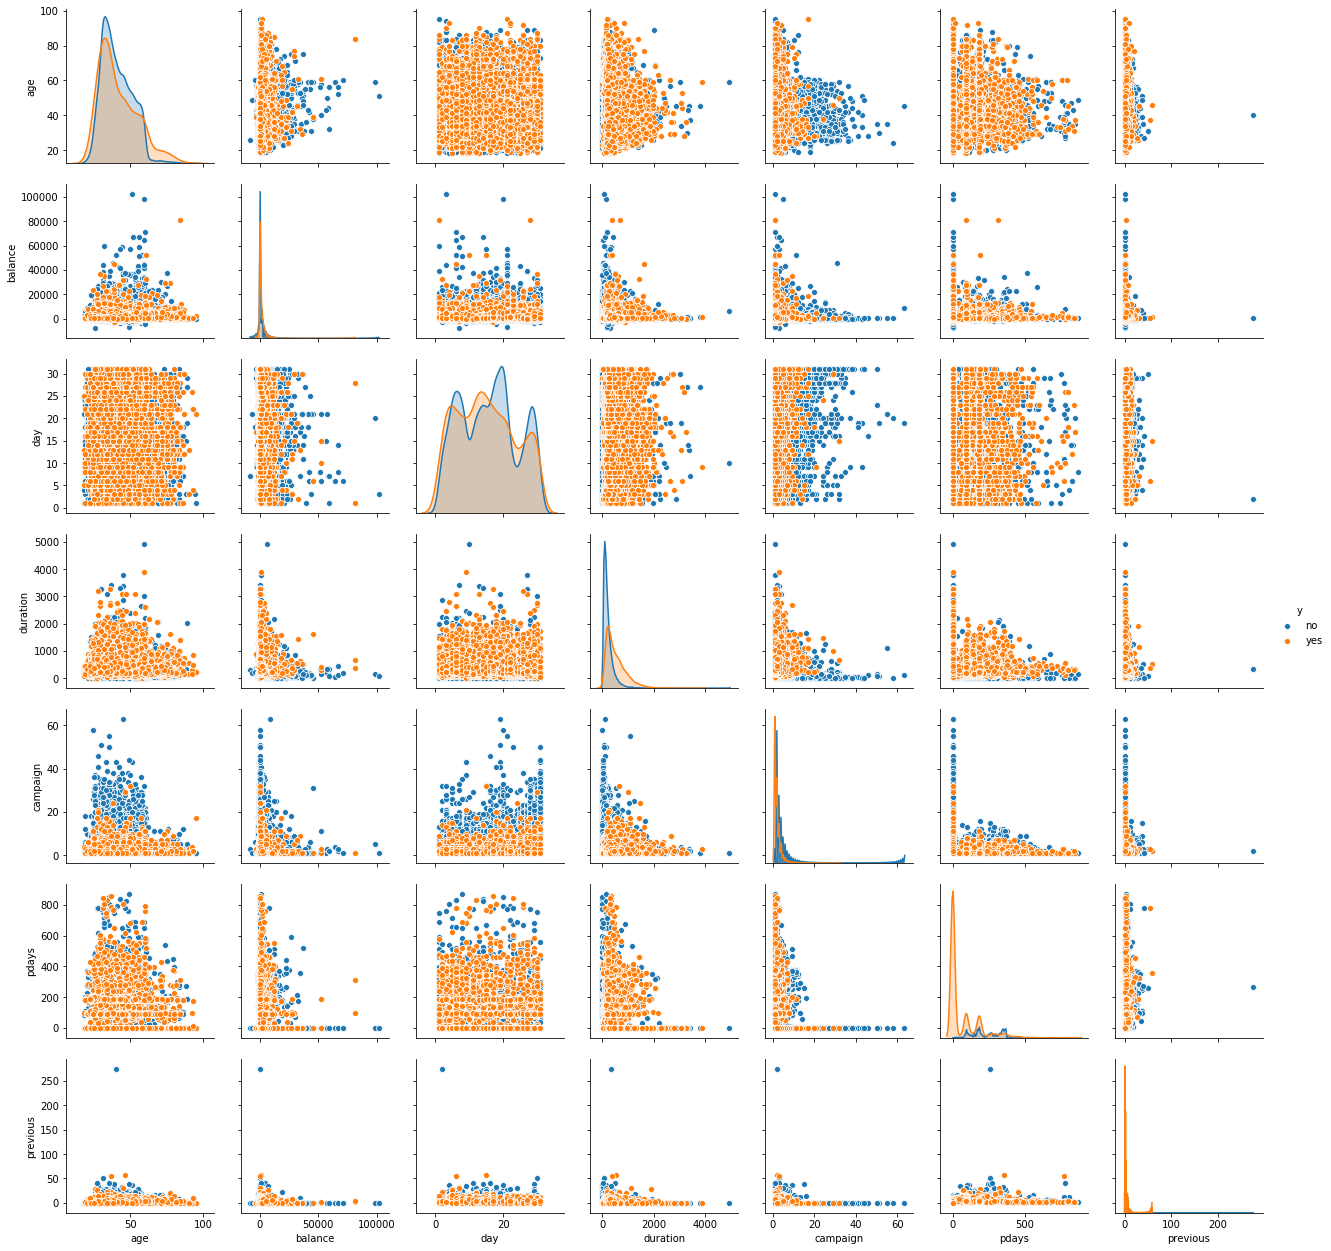

In [13]:
sns.pairplot(df, hue='y')

13.331168831168831

In [89]:
df_encoded = pd.get_dummies(df.iloc[:,:-1].select_dtypes(include='object'))
df_int = df.select_dtypes(exclude="object")
df_new = pd.concat([df_encoded, df_int], axis=1)
df_new.shape

(45211, 51)

In [91]:
X = df_new.iloc[:,:-1]
y = df.iloc[:, -1]

In [100]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=7, stratify=y)

In [112]:
y_train.value_counts()[0]/y_train.value_counts()[1]

7.548622366288493

In [113]:
y_test.value_counts()[0]/y_test.value_counts()[1]

7.546943919344676

In [131]:
# use a non-linear algo to solve the problem
# Decision Tree with default values

In [127]:
dtree = DecisionTreeClassifier(max_depth=None, random_state=10)

In [128]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [129]:
y_pred = dtree.predict(X_test)

In [130]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11119   858]
 [  822   765]]
              precision    recall  f1-score   support

          no       0.93      0.93      0.93     11977
         yes       0.47      0.48      0.48      1587

    accuracy                           0.88     13564
   macro avg       0.70      0.71      0.70     13564
weighted avg       0.88      0.88      0.88     13564



In [145]:
y = df.iloc[:,-1]
y.values

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [153]:
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier(max_depth=None)
print(cross_val_score(dtree, X, y, cv=10, scoring="accuracy").mean())

0.6263871845003621


In [15]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\prane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[11666   311]
 [ 1019   568]]
              precision    recall  f1-score   support

          no       0.92      0.97      0.95     11977
         yes       0.65      0.36      0.46      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [156]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
print(cross_val_score(rf, X, y, cv=10, scoring="accuracy").mean())

C:\Users\prane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

0.7278222689820597
